In [98]:
import pandas as pd
import numpy as np

In [99]:
data = pd.read_csv('C:\\Users\\Siddharth\\Desktop\\Projects\\Credit Risk\\credit risk data.csv')

#Creating dummy variables for 'purpose'
data_dummy = pd.get_dummies(data = data, prefix = 'purpose', prefix_sep = '_')
#data.head(5)

[LibLinear]Model accuracy: 0.86
Average precision-recall score: 0.93


array([[696,   5],
       [131, 168]], dtype=int64)

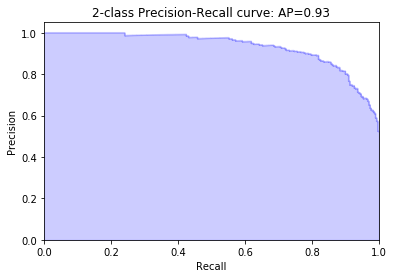

In [91]:
### Train/test split - Logistic Regression model - Model Evaluation ###

# Train/test split #
from sklearn.model_selection import train_test_split
y = data_dummy['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(data_dummy, y, test_size = 0.2)

# Logistics Regression model #
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state = 0, solver = 'liblinear', verbose = 2).fit(X_train, y_train)
y_pred = LR.predict(X_test) # array of predicted classes
LR.predict_proba(X_test) # array of calculated probabilities
y_score = LR.decision_function(X_test)

# Confusion Matrix #
from sklearn.metrics import confusion_matrix
Confusion_Matrix = confusion_matrix(y_test, y_pred)

# Model Accuracy #
from sklearn.metrics import accuracy_score
model_accuracy = accuracy_score(y_test, y_pred)
print('Model accuracy: {0:0.2f}'.format(model_accuracy))

# Precision-Recall score #
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_score)
print('Average precision-recall score: {0:0.2f}'.format(average_precision))

# Precision_Recall curve #
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.utils.fixes import signature
precision, recall, _ = precision_recall_curve(y_test, y_score)
# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

Confusion_Matrix

Model accuracy: 0.76
Average precision-recall score: 0.77


array([[329,   7],
       [113,  51]], dtype=int64)

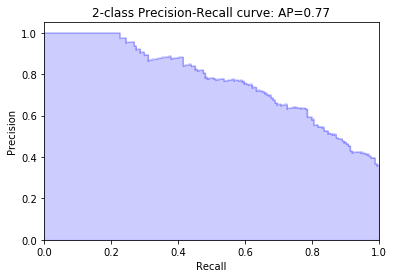

In [92]:
### Logistic Regression using CV - Parameter tuning - Model evaluation ###

# Train/test split #
from sklearn.model_selection import train_test_split
y = data_dummy['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(data_dummy, y, test_size = 0.1)

from sklearn.linear_model import LogisticRegressionCV
LR_cv = LogisticRegressionCV(cv=15, random_state = 0).fit(X_train, y_train)
y_pred = LR_cv.predict(X_test) # array of predicted classes
LR_cv.predict_proba(X_test) # array of calculated probabilities
y_score = LR_cv.decision_function(X_test)

# Confusion Matrix #
from sklearn.metrics import confusion_matrix
Confusion_Matrix = confusion_matrix(y_test, y_pred)

# Model Accuracy #
from sklearn.metrics import accuracy_score
model_accuracy = accuracy_score(y_test, y_pred)
print('Model accuracy: {0:0.2f}'.format(model_accuracy))

# Precision-Recall score #
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_score)
print('Average precision-recall score: {0:0.2f}'.format(average_precision))

# Precision_Recall curve #
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.utils.fixes import signature
precision, recall, _ = precision_recall_curve(y_test, y_score)
# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

Confusion_Matrix